# Aceleradev Codenation - Semana 3
## Túlio Vieira de Souza | Data Scientist

#### - Dataset contendo dados de casas para alugar no Zap Imóveis, retirado deste [link](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent)

As colunas deste dataset possuem os seguintes significados: 

- city: Cidade onde o imóvel está localizada / City where the property is located
- area: Área do imóvel / Property area
- rooms: Número de quartos / Quantity of rooms
- bathroom: Número de banheiros / Quantity of bathroom
- parking spaces: Número de vagas / Quantity of parking spaces
- floor: Andar / Floor
- animal: Aceita animais? / Acept animals?
- furniture: Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax 
- rent amount (RS): Valor do Aluguel (/) Rent amount 
- property tax (RS): IPTU (/) Property tax
- fire insurance (RS): Seguro de Incêndio / Fire Insurance
- total (RS): Valor total / Total

### 1. Importando as bibliotecas

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Importando o dataset

In [3]:
#Importing the dataset in the 'df' dataframe
df = pd.read_csv('houses_to_rent_v2.csv')

In [5]:
#Showing the first five rows from the 'df' dataframe
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
#Showing the types from the columns in 'df' dataframe
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [8]:
#Showing some informations about the 'df' dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## Problema Analisado: Explorar o valor do aluguel _(rent amount RS)_

### 3. Estatística Univariada

In [12]:
#Renaming the column 'rent amount (RS)' to 'valor_aluguel'
df.rename(columns={'rent amount (R$)':'valor_aluguel'}, inplace=True)

In [13]:
#Showing the mean of the 'valor_aluguel' column
df['valor_aluguel'].mean()

3896.247194163861

In [14]:
#Showing the median of the 'valor_aluguel' column
df['valor_aluguel'].median()

2661.0

In [15]:
#Showing the standard deviation (std) of the 'valor_aluguel' column
df['valor_aluguel'].std()

3408.5455176710675

In [16]:
#Showing some metrics from the 'valor_aluguel' column
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

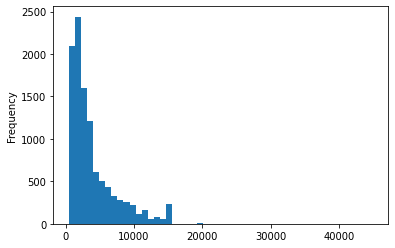

In [23]:
#Ploting a histogram from the 'valor_aluguel' column
df['valor_aluguel'].plot(kind='hist', bins=50)

In [56]:
#Showing the skewness value (how is a positive number, it is a positive skew)
df.valor_aluguel.skew()

1.8388773035440982

In [24]:
#Showint the kurtosis value (how is a positive number, it is a leptokurtic)
df.valor_aluguel.kurtosis()

4.624228179818687

### 4. Exploração de multivariáveis

### Iremos formular algumas perguntas para introduzir os métodos ensinados em Python:
 
1. Qual a cidade com a média de aluguel mais alta? 
2. Quantos banheiros existem nas residências com aluguéis mais altos? 
3. Os imóveis mais caros aceitam animal? 
4. Os imóveis mais caros são mobiliados? 

**Pergunta 1**. Qual a cidade com a média de aluguel mais alta? 

In [34]:
#Grouping the 'city' column by the rent number in 'valor_aluguel' column
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending=False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


Resposta: São Paulo

**Pergunta 2**. Quantos banheiros existem em média nas residencias com alugueis mais altos? 

*Observação*: Iremos definir um aluguel 'Alto' como valores acima de R$ 5000.00 (percentil de 75% ou Q3)

In [31]:
#Showing the quartis from the column 'valor_aluguel' from the 'df' dataframe
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

In [32]:
#Defining a new column named 'aluguel_alto' in the 'df' dataframe
df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]

In [36]:
#Grouping the 'aluguel_alto' column by the mean of number of bathrooms proposed in the 'bathroom' column
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

Resposta: 3.72 banheiros

**Pergunta 3**. Os imóveis mais caros aceitam animal? 

*Observação*: Continuaremos definindo um aluguel 'Alto' como valores acima de R$ 5000.00 (percentil de 75% ou Q3)

In [58]:
#Creating a new dataframe 'df_aluguel_alto' containing only expensive properties
df_aluguel_alto = df[df['aluguel_alto'] == 'Alto']

#Checking the percentage that is authorized animals in this properties
df_aluguel_alto['animal'].value_counts(normalize=True)

acept        0.820796
not acept    0.179204
Name: animal, dtype: float64

Resposta: 82% dos imóveis aceitam animais.

**Pergunta 4**. Os imóveis mais caros são mobiliados?

*Observação*: Continuaremos definindo um aluguel 'Alto' como valores acima de R$ 5000.00 (percentil de 75% ou Q3)

In [59]:
#Checking the percentage that is authorized animals in this properties
df_aluguel_alto['furniture'].value_counts(normalize=True)

not furnished    0.654195
furnished        0.345805
Name: furniture, dtype: float64

Resposta: Apenas 34.5% dos imóveis mais caros são mobiliados.

### Iremos formular algumas hipóteses que tentaremos comprovar através dos dados:

1. São Paulo é a cidade com o aluguel mais caro. (Nâo será analisada agora)
2. Quanto mais banheiros em um imóvel, maior o valor do seu aluguel.
3. Os imóveis com mobilia tem o aluguel mais alto. 

In [61]:
#Showing the correlation between 'valor_aluguel' and 'bathroom' columns in 'df' dataframe
df[['valor_aluguel', 'bathroom']].corr(method='spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


Resposta: A hipótese de que quanto mais banheiros, mais alto o valor do aluguel é plausível, devido a correlação forte entre as colunas do dataset.

In [62]:
#Creating a auxiliar dataframe 'aux'
aux = pd.DataFrame({'colunas':df.columns, 'tipos':df.dtypes})

In [63]:
#A list with the name of the columns with type int64
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [64]:
#Showing the correlation between all the numerical columns with 'valor_aluguel' column
for coluna in lista:
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

### 5. Visualização de Dados

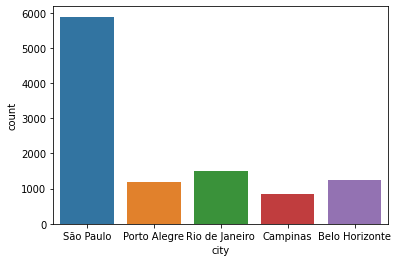

In [76]:
#Showing a countplot from the 'city' column in 'df' dataframe (Same that value_counts())
sns.countplot(x='city', data=df)

plt.show()

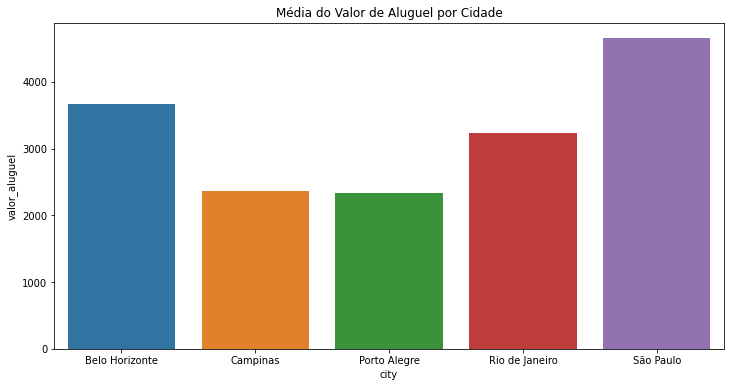

In [73]:
#Defining the size of the figure
plt.figure(figsize=(12,6))

#Showing a barplot from the mean of 'valor_aluguel' from each 'city' 
sns.barplot(x='city', y='valor_aluguel', data=df.groupby('city')['valor_aluguel'].mean().reset_index())

#Defining a title from the plot
plt.title('Média do Valor de Aluguel por Cidade')

plt.show()

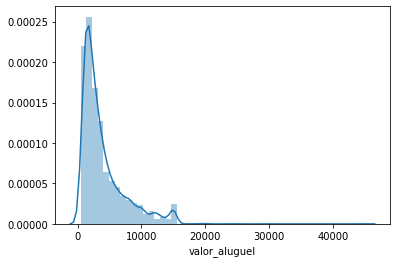

In [77]:
#Showing a histogram (distplot) for the 'valor_aluguel' column
sns.distplot(df['valor_aluguel'])

plt.show()

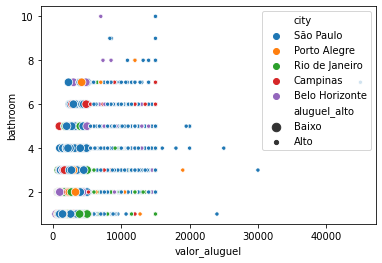

In [83]:
#Showing a scatterplot between 'valor_aluguel' and 'bathroom'
sns.scatterplot(x='valor_aluguel', y='bathroom', data=df, size='aluguel_alto', hue='city')

plt.show()

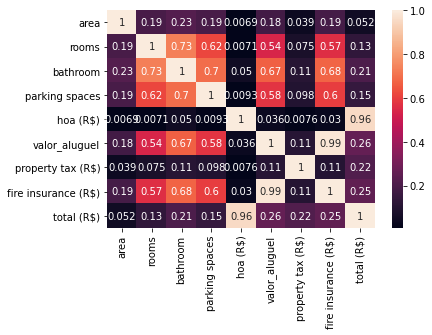

In [87]:
#Showing a correlation matrix (heatmap) from the 'df' dataframe
sns.heatmap(df.corr(), annot=True)

plt.show()

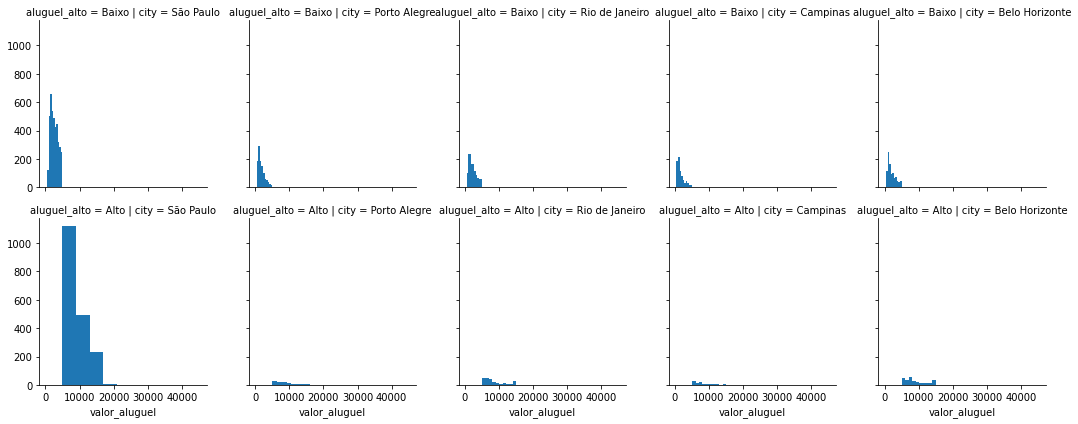

In [88]:
g = sns.FacetGrid(df, col='city', row='aluguel_alto')
g = g.map(plt.hist, 'valor_aluguel')